In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.config import RAW_DATA_FILE

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Documents\LOAN DATA PROJECT\data\processed\loan_data_clean.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (35831, 30)


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,int_rate,loan_amount,total_acc,total_payment,loan_category,issue_year,issue_month,issue_month_name,income_bracket,dti_category
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-05-07,2021-04-12,2021-07-13,...,0.1527,2500.0,4,1009.0,Bad Loan,2021,5,May,<30K,Low Risk
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-05-24,2021-09-19,2021-08-28,...,0.1864,3000.0,4,3939.0,Good Loan,2021,5,May,30-50K,Low Risk
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-03-18,2021-06-07,2021-01-30,...,0.1596,12000.0,11,3522.0,Bad Loan,2021,3,March,30-50K,High Risk
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-04-22,2021-03-24,2021-01-08,...,0.1065,4500.0,9,4911.0,Good Loan,2021,4,April,30-50K,Low Risk
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-25,2021-06-26,2021-08-12,...,0.0603,3500.0,28,3835.0,Good Loan,2021,1,January,75-100K,Low Risk


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35831 entries, 0 to 35830
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35831 non-null  int64  
 1   address_state          35831 non-null  object 
 2   application_type       35831 non-null  object 
 3   emp_length             35831 non-null  object 
 4   emp_title              35831 non-null  object 
 5   grade                  35831 non-null  object 
 6   home_ownership         35831 non-null  object 
 7   issue_date             35831 non-null  object 
 8   last_credit_pull_date  35831 non-null  object 
 9   last_payment_date      35831 non-null  object 
 10  loan_status            35831 non-null  object 
 11  next_payment_date      35831 non-null  object 
 12  member_id              35831 non-null  int64  
 13  purpose                35831 non-null  object 
 14  sub_grade              35831 non-null  object 
 15  te

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_year,issue_month
count,3.583100e+04,3.583100e+04,35831.000000,35831.000000,35831.000000,35831.000000,35831.000000,35831.000000,35831.000000,35831.0,35831.000000
mean,6.755878e+05,8.410061e+05,61096.020942,0.134748,303.319228,0.119042,10373.630376,21.574140,11248.139516,2021.0,6.508024
std,2.108068e+05,2.665510e+05,27750.914239,0.066549,182.082499,0.036303,6314.329937,11.164256,7679.916105,0.0,3.442958
min,5.473400e+04,7.472400e+04,4000.000000,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000,2021.0,1.000000
25%,5.098860e+05,6.574290e+05,40000.000000,0.083900,163.680000,0.089400,5000.000000,13.000000,5491.000000,2021.0,4.000000
50%,6.533700e+05,8.352780e+05,56000.000000,0.136000,269.880000,0.117100,9300.000000,20.000000,9475.000000,2021.0,7.000000
75%,8.294650e+05,1.038200e+06,77242.500000,0.187200,401.400000,0.142700,14500.000000,28.000000,15472.000000,2021.0,9.000000
max,1.077501e+06,1.314167e+06,145596.000000,0.299900,1022.930000,0.244000,29375.000000,90.000000,45561.000000,2021.0,12.000000


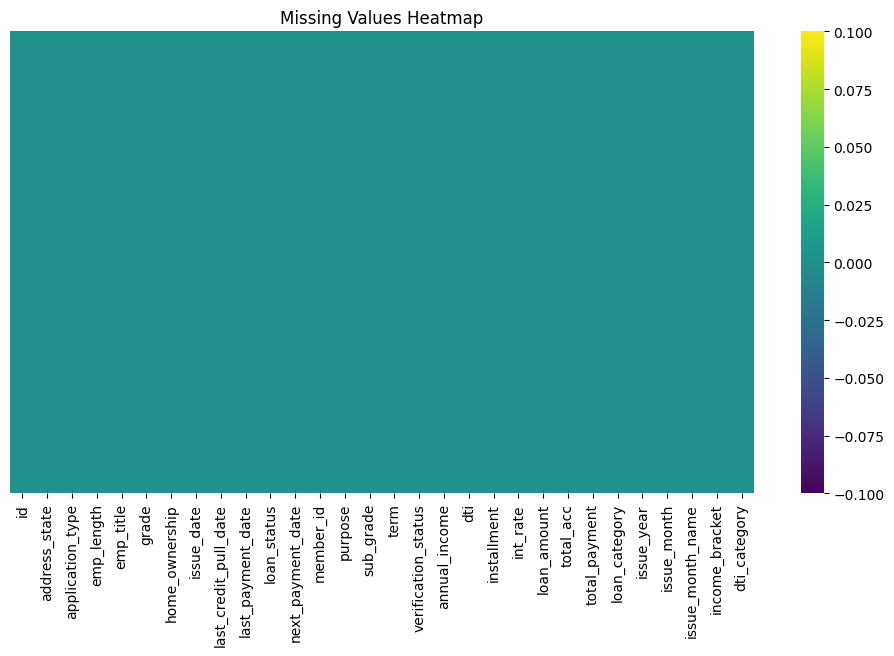

In [4]:
# Missing values visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


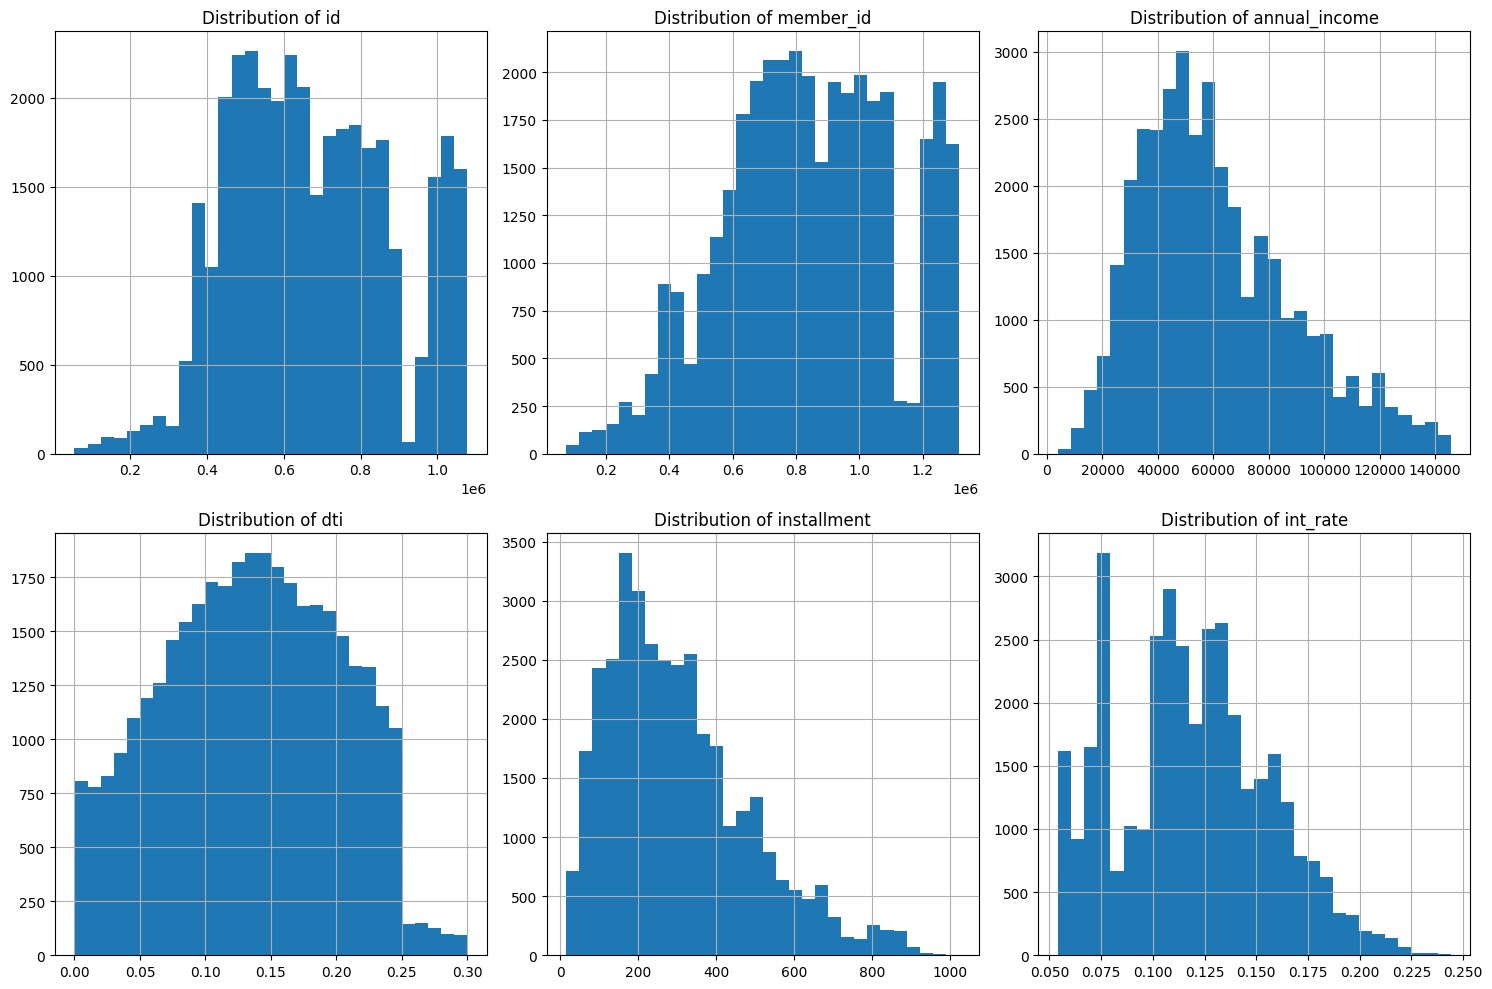

In [5]:
# Distribution plots
numerical_cols = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:6]):
    df[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()                                      
plt.show()